In [1]:
# Import relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
raw_data=pd.read_csv('HousingData.csv')    # Load Data
raw_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT -  lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [3]:
raw_data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       486 non-null float64
ZN         486 non-null float64
INDUS      486 non-null float64
CHAS       486 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        486 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      486 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data=raw_data.copy()

In [6]:
data.dropna(axis=0,inplace = True)     # Drop null values

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Treating Outliers by IQR method

In [8]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3 - q1 
iqr

CRIM         3.354018
ZN          12.500000
INDUS       12.970000
CHAS         0.000000
NOX          0.171000
RM           0.726250
AGE         48.775000
DIS          3.006600
RAD         20.000000
TAX        385.750000
PTRATIO      2.800000
B           20.192500
LSTAT        9.992500
MEDV         8.200000
dtype: float64

In [9]:
data_clean=data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + iqr))).any(axis=1)]
data_clean.skew()

CRIM       2.554580
ZN         2.130099
INDUS      1.061771
CHAS       0.000000
NOX        0.827386
RM         0.115495
AGE       -0.498178
DIS        0.650974
RAD        2.296654
TAX        1.399726
PTRATIO   -0.767334
B         -2.135811
LSTAT      0.463932
MEDV       0.186883
dtype: float64

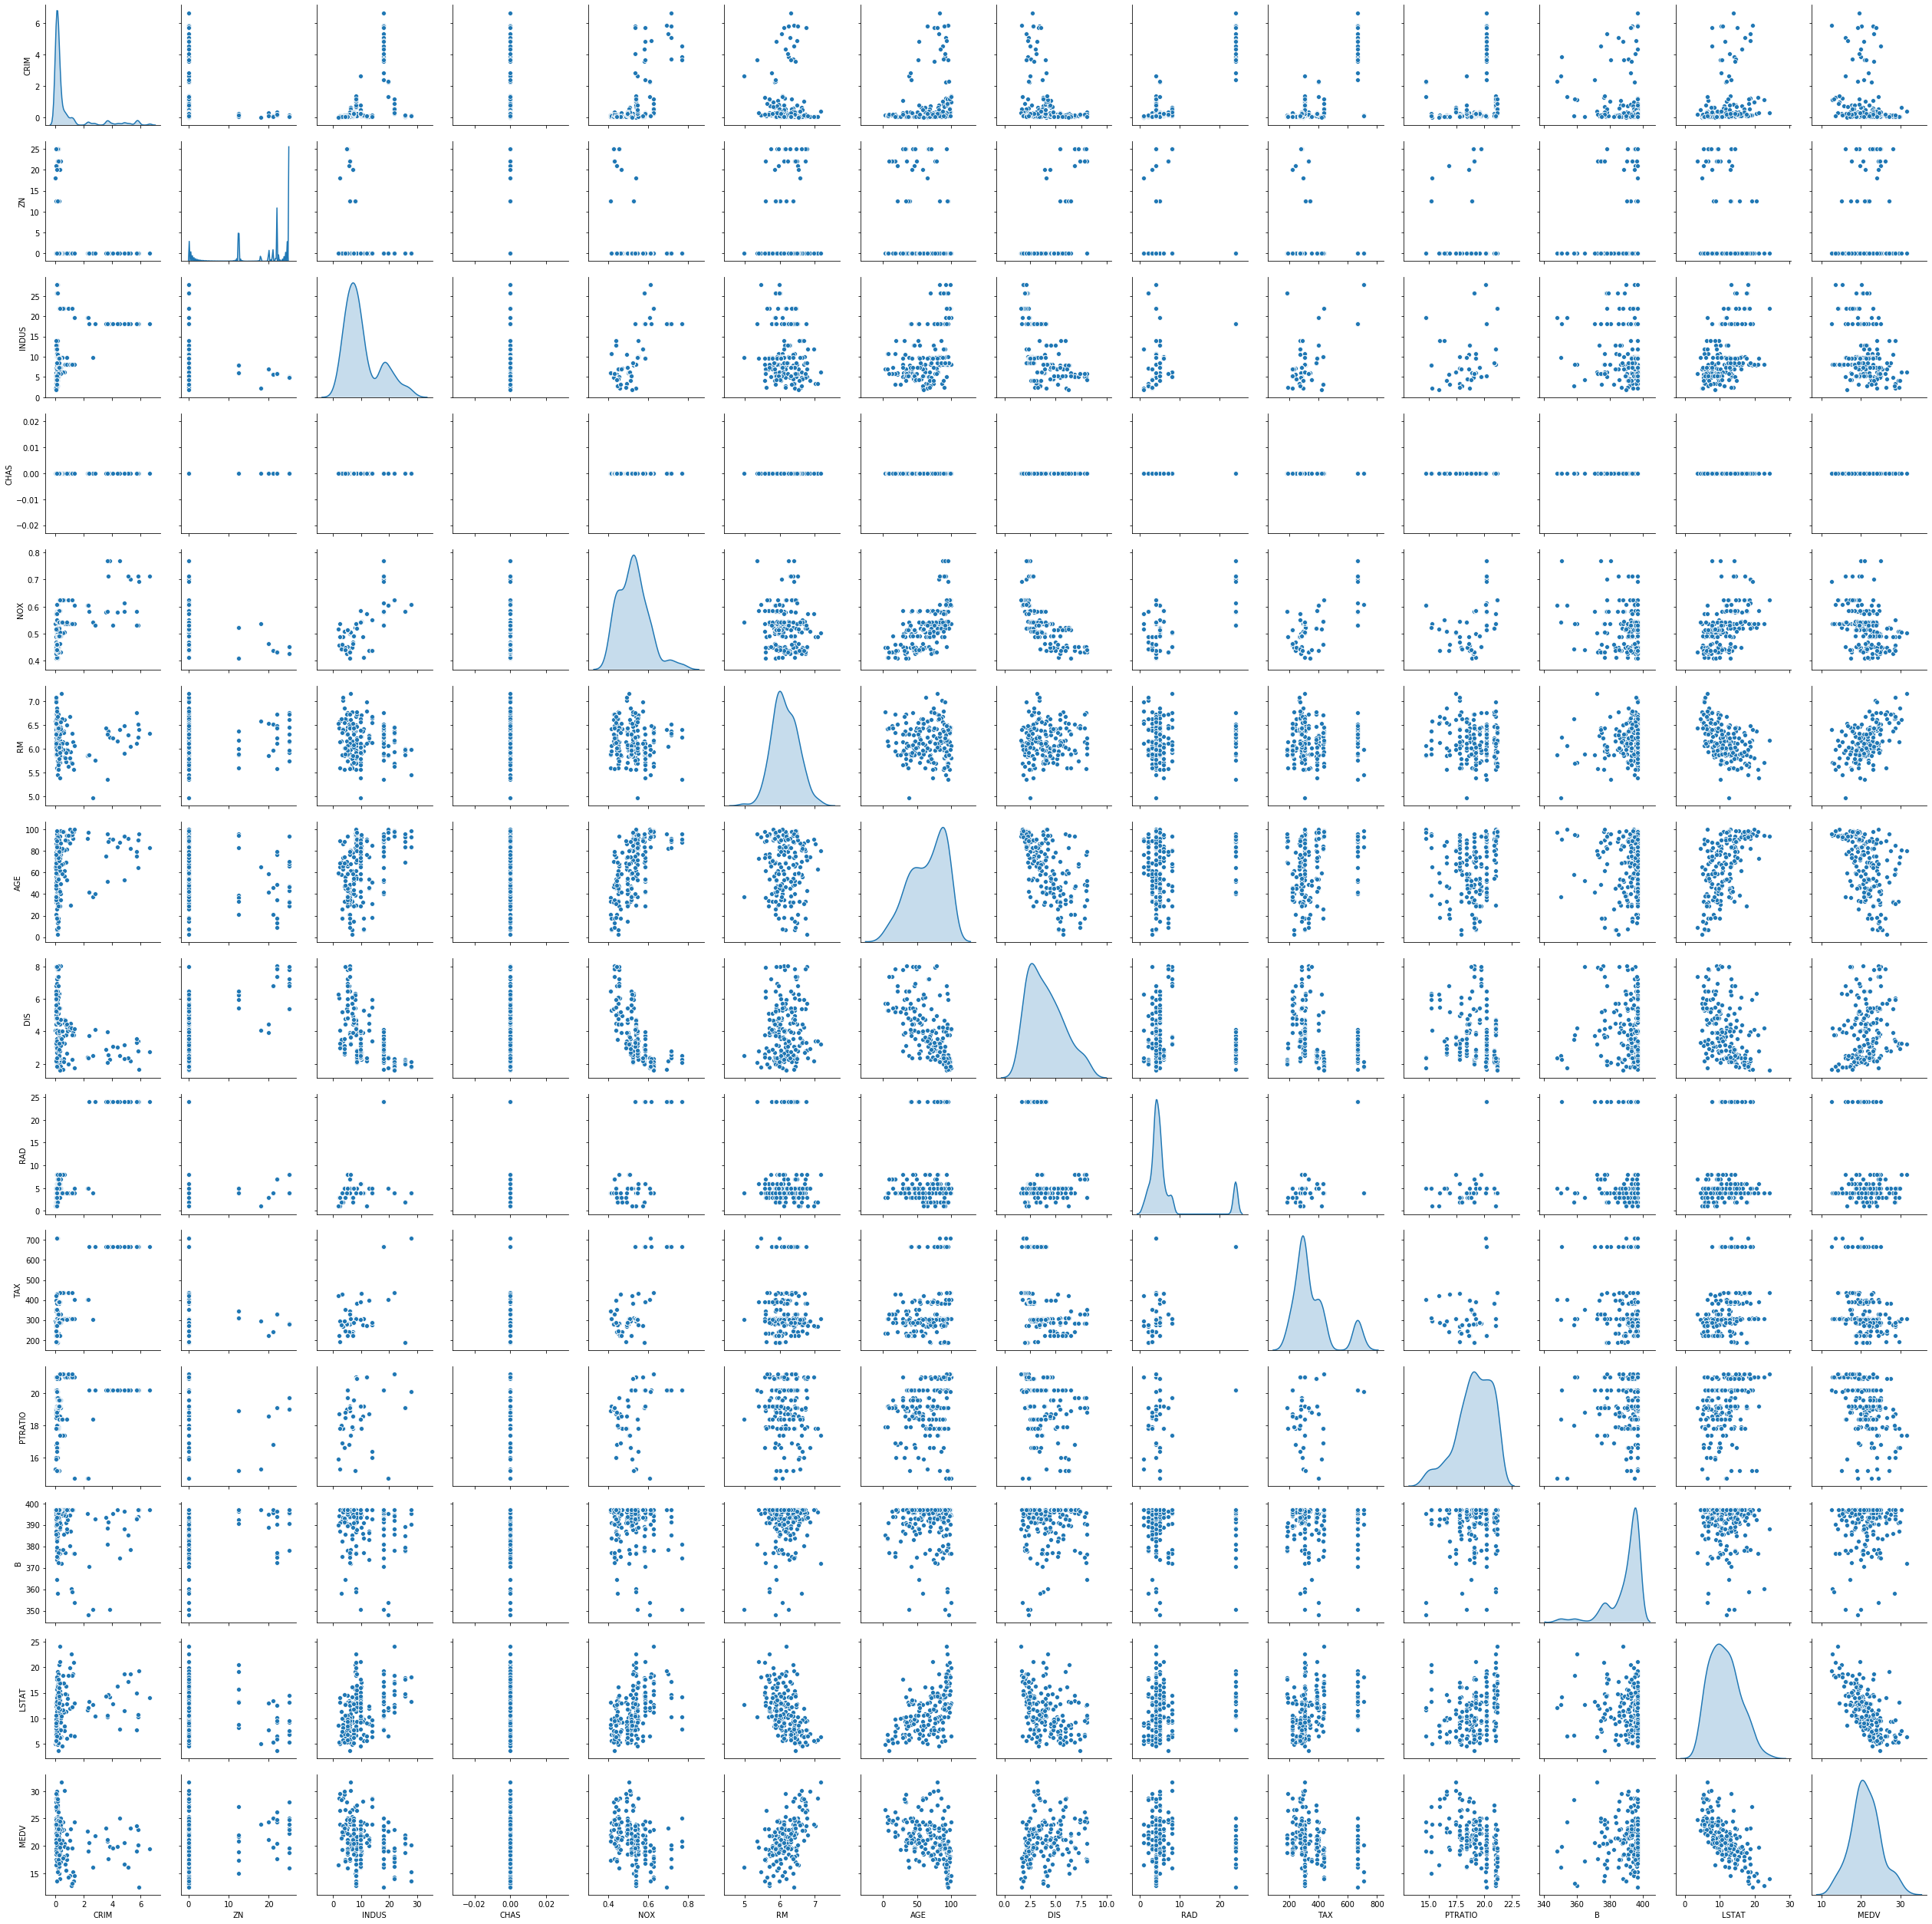

In [10]:
sns.pairplot(data_clean, diag_kind = 'kde')

In [11]:
log_medv=np.log(data_clean['MEDV'])
data_clean['log_MEDV'] = log_medv
data_clean.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,log_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,3.356897
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,3.299534
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,2.708050


In [12]:
data_clean=data_clean.drop(['MEDV'],axis = 1)

In [13]:
data_clean.corr().abs() # Analysing Correlation 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,log_MEDV
CRIM,1.000000,0.182981,0.450924,NaN,0.586236,0.009814,0.256931,0.292669,0.905714,0.764249,0.242311,0.145574,0.222548,0.182350
ZN,0.182981,1.000000,0.315213,NaN,0.435158,0.094665,0.269387,0.626353,0.056032,0.199630,0.139523,0.050788,0.202355,0.136946
INDUS,0.450924,0.315213,1.000000,NaN,0.684397,0.103518,0.454201,0.590347,0.376743,0.603890,0.293574,0.113243,0.434350,0.300019
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.586236,0.435158,0.684397,NaN,1.000000,0.111269,0.626417,0.726729,0.498856,0.622566,0.328645,0.095149,0.459788,0.349737
RM,0.009814,0.094665,0.103518,NaN,0.111269,1.000000,0.037685,0.061059,0.036612,0.020224,0.090163,0.150971,0.511773,0.529399
AGE,0.256931,0.269387,0.454201,NaN,0.626417,0.037685,1.000000,0.615476,0.137936,0.316080,0.238069,0.083363,0.583208,0.450667
DIS,0.292669,0.626353,0.590347,NaN,0.726729,0.061059,0.615476,1.000000,0.172118,0.402071,0.212975,0.013828,0.392386,0.166830
RAD,0.905714,0.056032,0.376743,NaN,0.498856,0.036612,0.137936,0.172118,1.000000,0.806196,0.232618,0.079268,0.156439,0.068678
TAX,0.764249,0.199630,0.603890,NaN,0.622566,0.020224,0.316080,0.402071,0.806196,1.000000,0.282369,0.069224,0.317780,0.267320


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Checking for Multi-collinearity
variables = data_clean[['PTRATIO','INDUS','AGE','RM','LSTAT']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,131.689165,PTRATIO
1,5.091822,INDUS
2,12.903356,AGE
3,105.757764,RM
4,15.309625,LSTAT


In [16]:
data_clean.drop('PTRATIO',axis=1,inplace= True)

In [17]:
data_pre=data_clean.copy()

In [20]:
data_pre = data_clean[['INDUS','AGE','RM','LSTAT','log_MEDV']]

# Building Linear Model

In [21]:
targets = data_pre['log_MEDV']
inputs = data_pre.drop(['log_MEDV'],axis = 1)

In [22]:
from sklearn.preprocessing import StandardScaler    # Scaling Data

In [23]:
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
inputs_sc = scaler.transform(inputs) 

In [25]:
from sklearn.feature_selection import f_regression     # Checking p_values

In [26]:
f_regression(inputs_sc,targets)

(array([ 18.20029512,  46.8949379 ,  71.64917371, 172.48837908]),
 array([3.17727678e-05, 1.08510611e-10, 7.93065173e-15, 3.15640294e-28]))

In [30]:
p_values = f_regression(inputs_sc,targets)[1]
p_values.round(3)

array([0., 0., 0., 0.])

In [31]:
from sklearn.model_selection import train_test_split    # Splitting data in Train - Test
x_train, x_test, y_train, y_test = train_test_split(inputs_sc, targets, test_size=0.2, random_state=365)

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [33]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_hat = reg.predict(x_train)

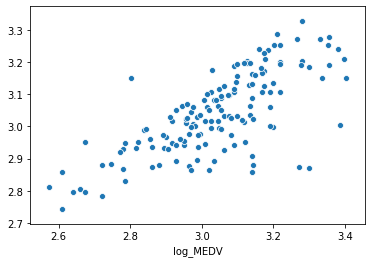

In [35]:
sns.scatterplot(x=y_train,y=y_hat)

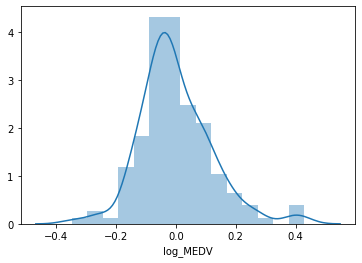

In [36]:
sns.distplot(y_train - y_hat)

In [37]:
reg.score(x_train,y_train)    # R2 

0.5220166516412198

In [44]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [45]:
adj_r2(inputs_sc,targets)

0.5327640862765393

In [38]:
reg.intercept_

3.0368993784432043

In [39]:
reg.coef_

array([ 0.00113074, -0.03496039,  0.05620849, -0.06937803])

In [46]:
y_hat_test = reg.predict(x_test)

In [41]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,22.575535
1,23.123104
2,18.454456
3,26.036431
4,17.364452


In [47]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,22.575535,NaN
1,23.123104,NaN
2,18.454456,NaN
3,26.036431,NaN
4,17.364452,NaN
5,17.875113,NaN
6,24.513040,NaN
7,23.205900,NaN
8,19.033530,NaN
9,21.231737,NaN


In [48]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    3.356897
1    3.314186
2    2.867899
3    3.453157
4    2.933857
Name: log_MEDV, dtype: float64

In [49]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,22.575535,28.7
1,23.123104,27.5
2,18.454456,17.6
3,26.036431,31.6
4,17.364452,18.8
5,17.875113,18.8
6,24.513040,28.4
7,23.205900,23.9
8,19.033530,19.4
9,21.231737,20.6


In [50]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [51]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,22.575535,28.7,6.124465,21.339598
1,23.123104,27.5,4.376896,15.915986
2,18.454456,17.6,-0.854456,4.854864
3,26.036431,31.6,5.563569,17.606230
4,17.364452,18.8,1.435548,7.635893
5,17.875113,18.8,0.924887,4.919612
6,24.513040,28.4,3.886960,13.686481
7,23.205900,23.9,0.694100,2.904183
8,19.033530,19.4,0.366470,1.889020
9,21.231737,20.6,-0.631737,3.066684


In [52]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
22,22.64,22.60,-0.04,0.18
32,22.75,22.80,0.05,0.20
16,19.90,20.10,0.20,0.98
15,21.96,21.60,-0.36,1.67
12,19.94,19.60,-0.34,1.72
8,19.03,19.40,0.37,1.89
19,24.81,25.30,0.49,1.93
10,17.78,17.40,-0.38,2.17
29,23.74,24.40,0.66,2.70
28,24.10,24.80,0.70,2.82


END